# Ejercicio 7: Álgebra de Embeddings

## Objetivo de la práctica

Generar embeddings con sentence-transformers (SBERT, E5), e indexar documentos con FAISS 

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [19]:
import gensim.downloader as api

# Cargar modelo
model = api.load("word2vec-google-news-300")  # O word2vec-google-news-300

In [20]:
model

In [21]:
vec = lambda word: model[word]

In [22]:
# Palabra base
x = "teacher"

# Vector de la palabra base
v_x = vec(x)

# Lista de palabras
y = [
    "coach", "tutor", "trainer", "educator",
    "professor", "mentor", "dog", "tree",
    "cat", "horse", "movie"
]

# Vectores de las palabras
vec_y = [vec(word) for word in y]


In [23]:
from sklearn.metrics.pairwise import cosine_similarity


In [24]:
sim = [
    cosine_similarity(
        v_x.reshape(1, -1),
        vec_word.reshape(1, -1)
    )
    for vec_word in vec_y
]

In [25]:
z = zip(y, sim)

print(sorted(z, key=lambda x: x[1], reverse=True))

[('educator', array([[0.6091449]], dtype=float32)), ('tutor', array([[0.5925524]], dtype=float32)), ('professor', array([[0.39003688]], dtype=float32)), ('coach', array([[0.36374468]], dtype=float32)), ('mentor', array([[0.3161721]], dtype=float32)), ('trainer', array([[0.26810205]], dtype=float32)), ('horse', array([[0.13835363]], dtype=float32)), ('cat', array([[0.12398741]], dtype=float32)), ('dog', array([[0.12156066]], dtype=float32)), ('movie', array([[0.11608775]], dtype=float32)), ('tree', array([[0.09888709]], dtype=float32))]


In [26]:
x = 'Honda_Civic'
model.most_similar(positive=[x], topn=10)

[('Honda_Accord', 0.8585812449455261),
 ('Nissan_Altima', 0.8260411024093628),
 ('Toyota_Corolla', 0.8244181871414185),
 ('Volkswagen_Jetta', 0.8177759051322937),
 ('Nissan_Maxima', 0.8075639605522156),
 ('Ford_Taurus', 0.8074986934661865),
 ('Ford_Explorer', 0.8032485246658325),
 ('Nissan_Sentra', 0.7960279583930969),
 ('Toyota_Camry', 0.7872045040130615),
 ('Dodge_Neon', 0.7867123484611511)]

In [27]:
diff = vec_y[3] - v_x
e1 = diff / np.linalg.norm(diff)

In [28]:
v_tmp = vec_y[7] - v_x
proj_on_e1 = np.dot(v_tmp, e1) * e1
e2 = v_tmp - proj_on_e1
e2 /= np.linalg.norm(e2)

In [29]:
def project(v):
  return np.array([np.dot(v, e1), np.dot(v, e2)])

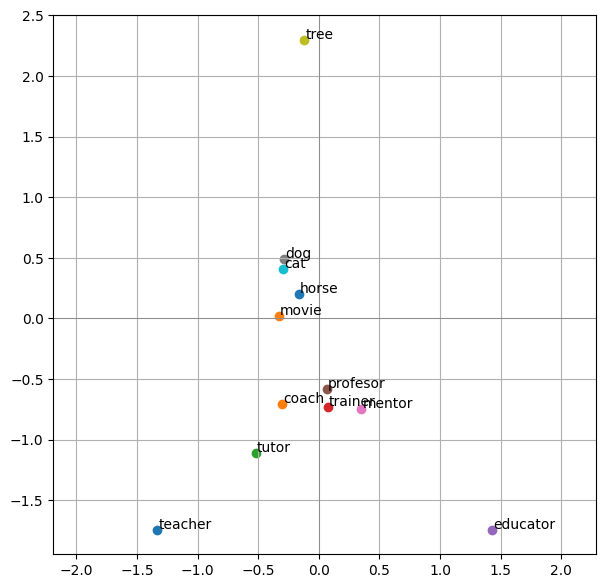

In [30]:
points = {
    'teacher': vec('teacher'),
    'coach': vec('coach'),
    'tutor': vec('tutor'),
    'trainer': vec('trainer'),
    'educator': vec('educator'),
    'profesor': vec('profesor'),
    'mentor': vec('mentor'),
    'dog': vec('dog'),
    'tree': vec('tree'),
    'cat': vec('cat'),
    'horse': vec('horse'),
    'movie': vec('movie')
}

# Graficar
plt.figure(figsize=(7, 7))
for word, vector in points.items():
  x, y = project(vector)
  plt.scatter(x, y)
  plt.text(x + 0.01, y + 0.01, word)

plt.axhline(0, color='gray', lw=0.5)
plt.axvline(0, color='gray', lw=0.5)
plt.grid()
plt.axis('equal')
plt.show()

In [31]:
# Palabras base y sus vectores
a, va = 'king', vec('king')
b, vb = 'man', vec('man')
c, vc = 'woman', vec('woman')

In [32]:
q, vq = 'q', (va - vb + vc)

In [33]:
# Construcción de ejes (álgebra de embeddings)
diff = va - vb
e1 = diff / np.linalg.norm(diff)

v_tmp = vc - vb
proj_on_e1 = np.dot(v_tmp, e1) * e1
e2 = v_tmp - proj_on_e1
e2 /= np.linalg.norm(e2)

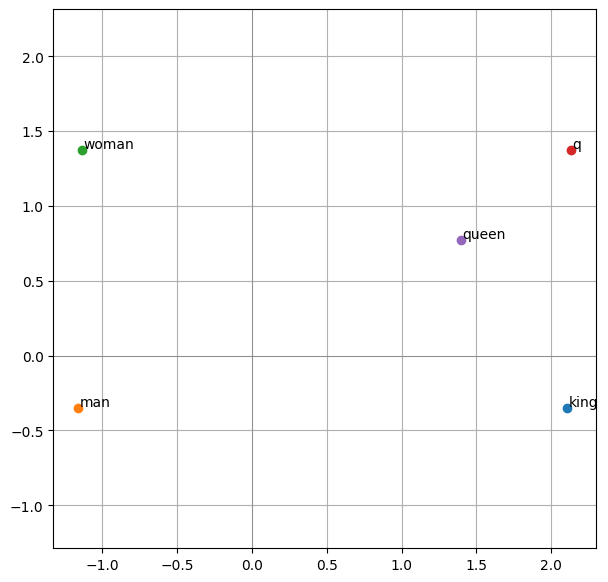

In [38]:
points = {
    'king': vec('king'),
    'man': vec('man'),
    'woman': vec('woman'),
    'q': (va-vb+vc),
    'queen': vec('queen')
    
}

# Graficar
plt.figure(figsize=(7, 7))
for word, vector in points.items():
  x, y = project(vector)
  plt.scatter(x, y)
  plt.text(x + 0.01, y + 0.01, word)

plt.axhline(0, color='gray', lw=0.5)
plt.axvline(0, color='gray', lw=0.5)
plt.grid()
plt.axis('equal')
plt.show()

In [39]:
sim = [cosine_similarity(X=vq.reshape(1, -1), Y=(vec('queen')).reshape(1, -1))]
sim


[array([[0.7300518]], dtype=float32)]